Index(['Longitude', 'Latitude', 'Speed', 'Distance', 'Time', 'Acc X', 'Acc Y',
       'Acc Z', 'Heading', 'gyro_x', 'gyro_y', 'gyro_z', 'label'],
      dtype='object')
Evaluation Results:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
AUC: 1.00


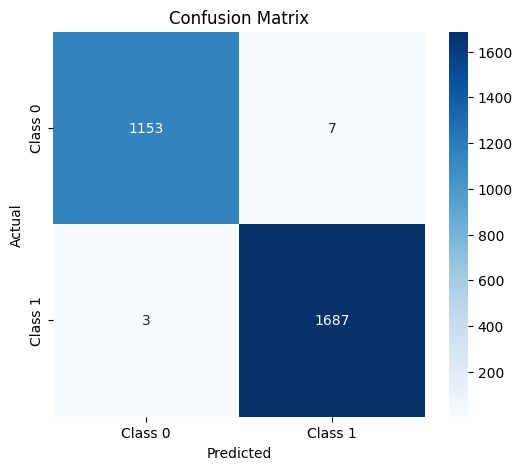

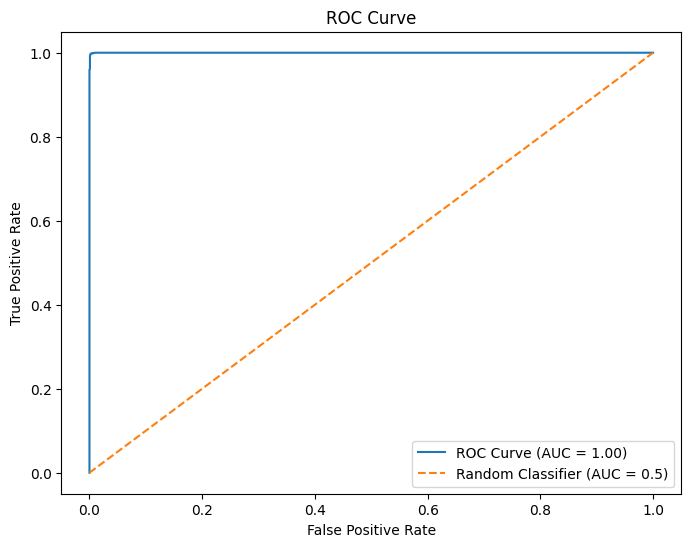

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load your dataset (replace 'your_dataset.csv' with your actual file path)
data = pd.read_csv('dataset.csv')  # Replace with your dataset's path

# Step 2: Print column names to check the target column
print(data.columns)

# Step 3: Check for missing values and handle them
data.dropna(inplace=True)  # Drop rows with missing values (can also use imputation if necessary)

# Step 4: Convert 'Time' to numeric (total seconds since midnight or separate features)
def convert_time_to_seconds(time_str):
    hours, minutes, seconds = map(int, time_str.split('-'))
    return hours * 3600 + minutes * 60 + seconds

# Apply the conversion to the 'Time' column
data['Time_seconds'] = data['Time'].apply(convert_time_to_seconds)

# Drop the original 'Time' column
data.drop(columns=['Time'], inplace=True)

# Step 5: Encode categorical target (if applicable)
# The target column is 'label' in your dataset, not 'target'
if data['label'].dtype == 'object':  # Check if target column is categorical
    label_encoder = LabelEncoder()
    data['label'] = label_encoder.fit_transform(data['label'])  # Adjusted for 'label' column

# Step 6: Split data into features (X) and target (y)
X = data.drop(columns=['label'])  # All columns except the target
y = data['label']  # The target column (adjusted for 'label')

# Step 7: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train the model (using RandomForestClassifier here, but you can change this model)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)  # Fit the model on the training data

# Step 9: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 10: Evaluate the model using different metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# For AUC/ROC, get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
auc = roc_auc_score(y_test, y_prob)

# Print the evaluation results
print("Evaluation Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

# Step 11: Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 12: ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
